In [63]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import numpy as np

from wordcloud import WordCloud
from collections import Counter

In [64]:
data = pd.read_csv('Hyundai_N_comments.csv')

Text(0.5, 1.0, 'Distribution of Sentiment')

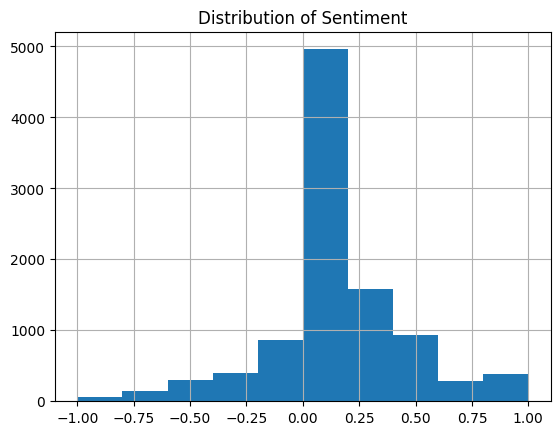

In [65]:
data['sentiment'].hist()
plt.title("Distribution of Sentiment")

Text(0.5, 1.0, 'Number of Comment per car')

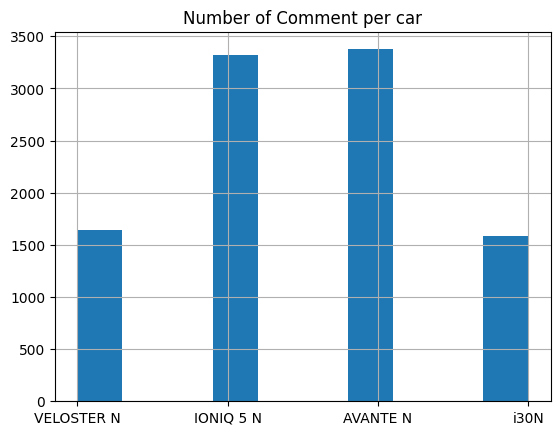

In [66]:
data['car_type'].hist()
plt.title("Number of Comment per car")

In [67]:
def transform(x):
    result = 0
    if x > 0.3:
        result = 1
    elif x < -0.3:
        result = -1
    return result

Text(0.5, 0.98, 'Sentiment per Car Type (w Neutral)')

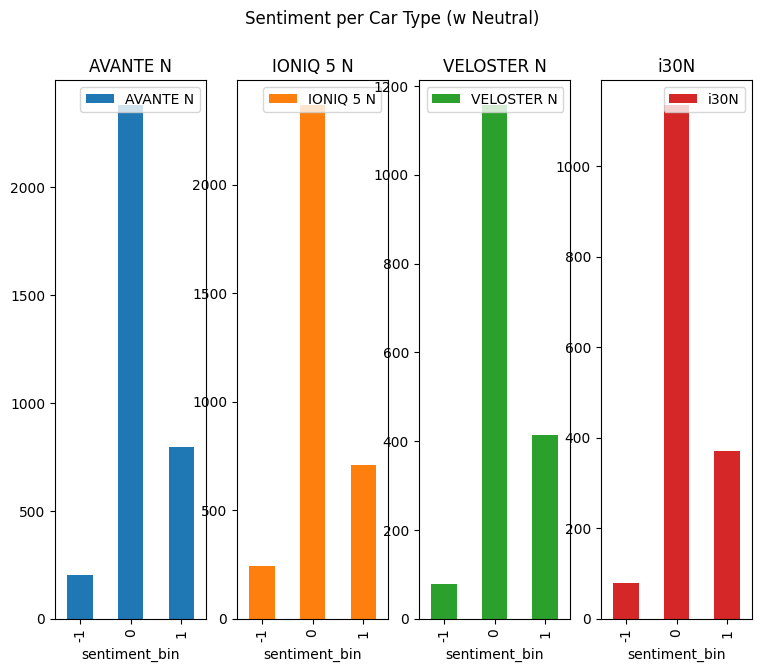

In [68]:
data['sentiment_bin'] = data.sentiment
data['sentiment_bin'] = data['sentiment'].apply(transform)
sentiment_cnt_per_car_type = data.groupby(['car_type', 'sentiment_bin']).count()['text']
ax = sentiment_cnt_per_car_type.unstack(level=0).plot(kind='bar', subplots=True, figsize=(9, 7), layout=(1, 4))
plt.suptitle("Sentiment per Car Type (w Neutral)")

In [69]:
def transform(x):
    result = np.nan
    if x > 0.3:
        result = 1
    elif x < -0.3:
        result = -1
    return result

Text(0.5, 0.98, 'Sentiment per Car Type (w/o Neutral)')

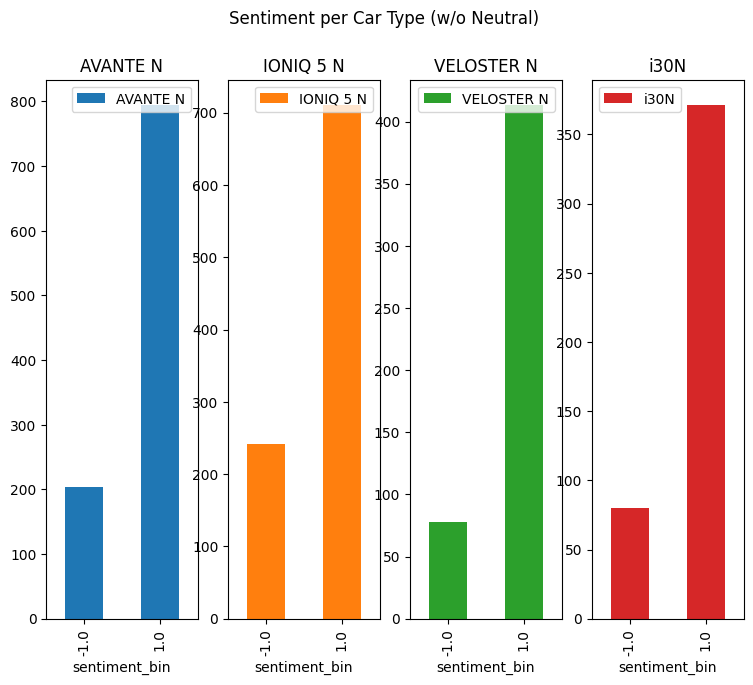

In [70]:
data['sentiment_bin'] = data.sentiment
data['sentiment_bin'] = data['sentiment'].apply(transform)
sentiment_cnt_per_car_type = data.groupby(['car_type', 'sentiment_bin']).count()['text']
ax = sentiment_cnt_per_car_type.unstack(level=0).plot(kind='bar', subplots=True, figsize=(9, 7), layout=(1, 4))
plt.suptitle("Sentiment per Car Type (w/o Neutral)")

/var/folders/w5/5pw5wgsx5vj49hnx6bdft1_80000gn/T/ipykernel_48762/2619532957.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.20361083 0.79638917]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sentiment_cnt_per_car_type['AVANTE N'] = sentiment_cnt_per_car_type['AVANTE N'] / total_avante


Text(0.5, 0.98, 'Normalized Sentiment per Car Type (w/o Neutral)')

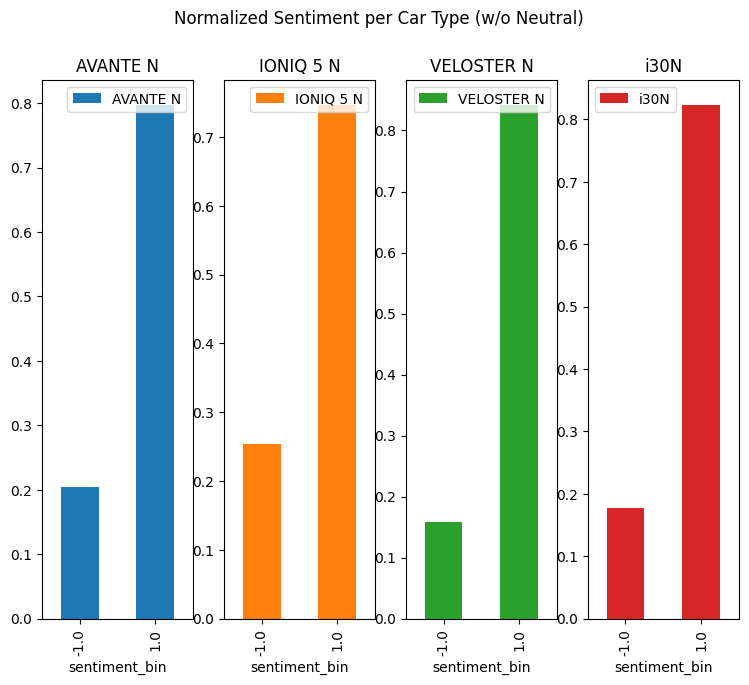

In [71]:
total_avante = sentiment_cnt_per_car_type['AVANTE N'].sum()
total_ioniq = sentiment_cnt_per_car_type['IONIQ 5 N'].sum()
total_veloster = sentiment_cnt_per_car_type['VELOSTER N'].sum()
total_i30 = sentiment_cnt_per_car_type['i30N'].sum()

sentiment_cnt_per_car_type['AVANTE N'] = sentiment_cnt_per_car_type['AVANTE N'] / total_avante
sentiment_cnt_per_car_type['IONIQ 5 N'] = sentiment_cnt_per_car_type['IONIQ 5 N'] / total_ioniq
sentiment_cnt_per_car_type['VELOSTER N'] = sentiment_cnt_per_car_type['VELOSTER N'] / total_veloster
sentiment_cnt_per_car_type['i30N'] = sentiment_cnt_per_car_type['i30N'] / total_i30
ax = sentiment_cnt_per_car_type.unstack(level=0).plot(kind='bar', subplots=True, figsize=(9, 7), layout=(1, 4))
plt.suptitle("Normalized Sentiment per Car Type (w/o Neutral)")

In [120]:
def preprocessing(x):    
    words = x.split(' ')
    for idx, word in enumerate(words):
        word = word.replace('\n', '')
        word = word.replace(',', '')
        word = word.replace('.', '')
        words[idx] = word
    return words


def show_wordcloud(positive_dict, negative_dict, prefix):
    positive_wc = WordCloud(font_path='NanumSquareNeo-cBd.ttf' ,background_color="white", max_font_size=60)
    positive_cloud = positive_wc.generate_from_frequencies(positive_dict)
    negative_wc = WordCloud(font_path='NanumSquareNeo-cBd.ttf', background_color="white", max_font_size=60)
    negative_cloud = negative_wc.generate_from_frequencies(negative_dict)

    plt.figure(figsize=(10,10))
    plt.subplot(211)
    plt.xticks([], [])
    plt.yticks([], [])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.imshow(positive_cloud)
    plt.title(f'{prefix} Positive YouTube Word Cloud')

    plt.subplot(212)
    plt.xticks([], [])
    plt.yticks([], [])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.imshow(negative_cloud)
    plt.title(f'{prefix} Negative YouTube Word Cloud')
    return

def list2sorted_dict(pos_list, neg_list):
    pos_flatten = list(itertools.chain(*pos_list))
    neg_flatten = list(itertools.chain(*neg_list))
    pos_dict = dict(Counter(pos_flatten))
    neg_dict = dict(Counter(neg_flatten))
    pos_sorted_dict = dict(sorted(pos_dict.items(), key=lambda item: item[1], reverse=True))
    neg_sorted_dict = dict(sorted(neg_dict.items(), key=lambda item: item[1], reverse=True))
    return pos_sorted_dict, neg_sorted_dict

def intersect(pos_sorted_dict, neg_sorted_dict):
    overall_intersect_words = list(set(pos_sorted_dict.keys())&set(neg_sorted_dict.keys()))
    overall_words = list(set(pos_sorted_dict.keys()) | set(neg_sorted_dict.keys()))
    return overall_intersect_words

def remove_words(positive_dict, negative_dict, intersect_words):
    for word in intersect_words:
        try:
            positive_dict.pop(word)
        except:
            pass
        try:
            negative_dict.pop(word)
        except:
            pass
    
    return positive_dict, negative_dict

def run_world_cloud_visualize(car_type, prefix):
    data = pd.read_csv('Hyundai_N_comments.csv')
    all_positive_words_list = data.text.loc[(data.sentiment > 0.3)].apply(preprocessing).to_list()
    all_negative_words_list = data.text.loc[(data.sentiment < -0.3) ].apply(preprocessing).to_list()

    if car_type != "None":
        positive_words_list = data.text.loc[(data.sentiment > 0.3) & (data.car_type==CAR_TYPE)].apply(preprocessing).to_list()
        negative_words_list = data.text.loc[(data.sentiment < -0.3) & (data.car_type==CAR_TYPE)].apply(preprocessing).to_list()
    else:
        positive_words_list = all_positive_words_list
        negative_words_list = all_negative_words_list

    all_pos_sorted_dict, all_neg_sorted_dict = list2sorted_dict(all_positive_words_list, all_negative_words_list)
    pos_sorted_dict, neg_sorted_dict = list2sorted_dict(positive_words_list, negative_words_list)
    
    intersect_words = intersect(all_pos_sorted_dict, all_neg_sorted_dict)
    pos_sorted_dict, neg_sorted_dict = list2sorted_dict(positive_words_list, negative_words_list)
    pos_dict, neg_dict = remove_words(pos_sorted_dict, neg_sorted_dict, intersect_words)
    show_wordcloud(pos_dict, neg_dict, prefix)

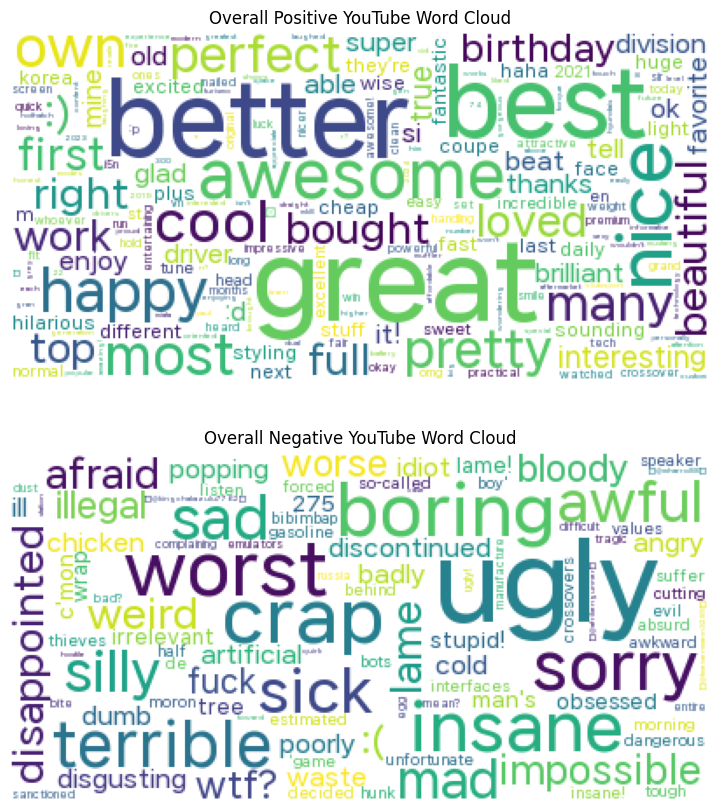

In [121]:
run_world_cloud_visualize("None", "Overall")

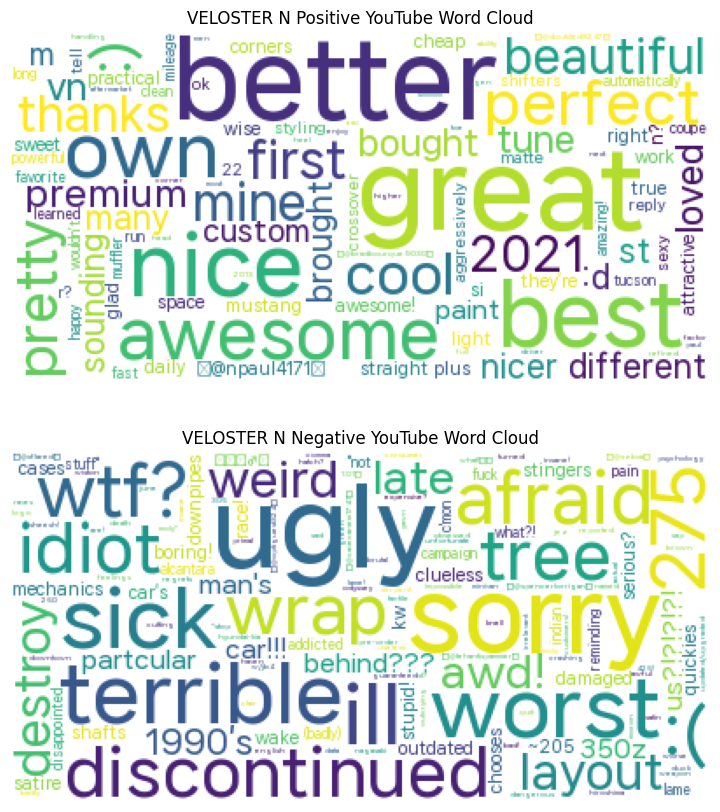

In [127]:
CAR_TYPE='VELOSTER N'
run_world_cloud_visualize(CAR_TYPE, CAR_TYPE)

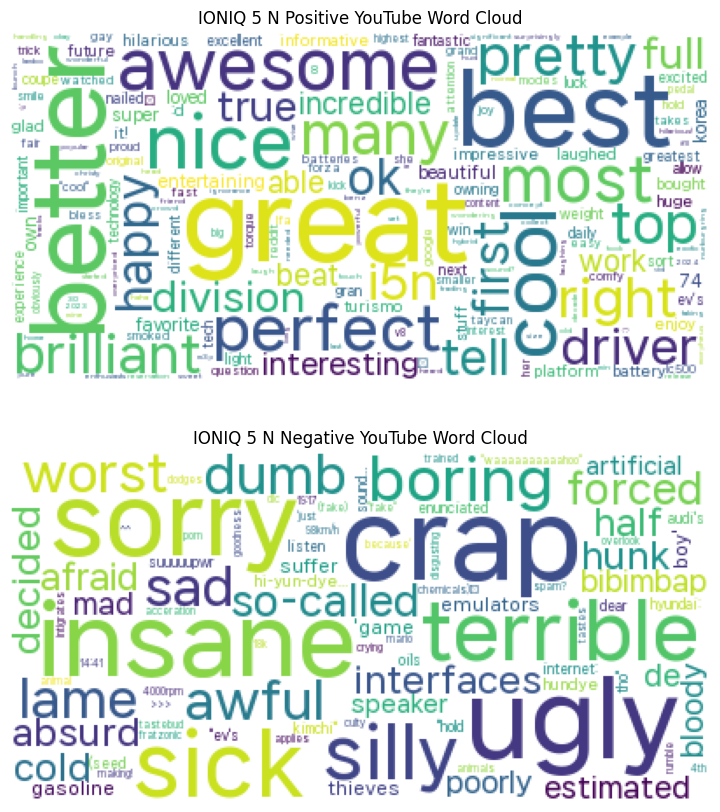

In [128]:
CAR_TYPE='IONIQ 5 N'
run_world_cloud_visualize(CAR_TYPE, CAR_TYPE)

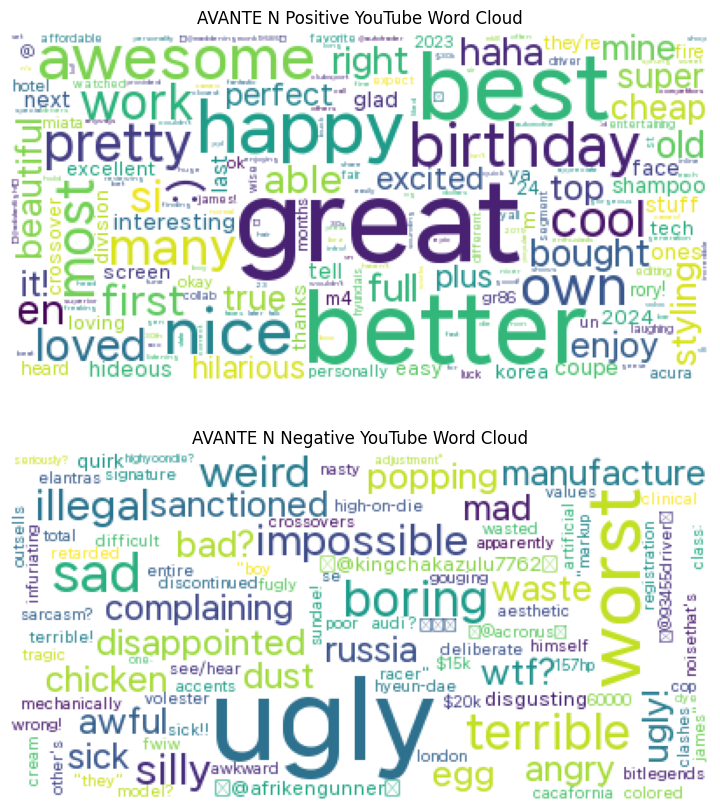

In [129]:
CAR_TYPE='AVANTE N'
run_world_cloud_visualize(CAR_TYPE, CAR_TYPE)

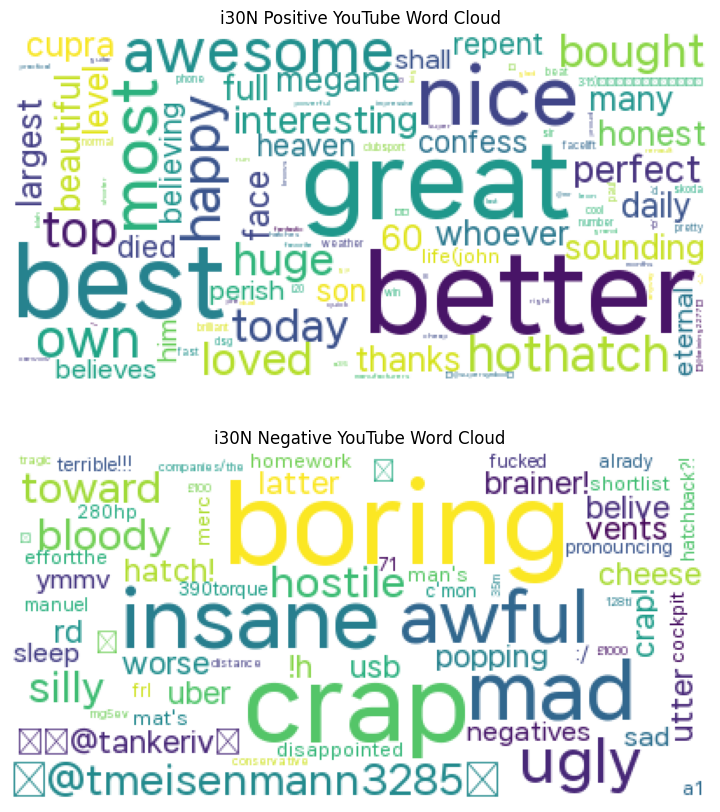

In [132]:
CAR_TYPE='i30N'
run_world_cloud_visualize(CAR_TYPE, CAR_TYPE)